In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import collections
import sys
sys.path.append('..\\custom_libraries')

# Custom library to analyze NC rate of deterioration
import rate_analysis

In [62]:
df = pd.read_csv('../../spreadsheet_data/i16WB_tag_replaced.csv')
initial_state_arr = np.array([])
avg_state_arr = np.array([])
det_arr = np.array([])
for year in range(2014, 2018):
    initial_states = df[str(year)].to_numpy()
    avg_state = rate_analysis.calc_average_state_by_slab(df, str(year), 5)
    det = rate_analysis.has_deteriorated(df, str(year), str(year+1))
    initial_state_arr = np.append(initial_state_arr, initial_states)
    avg_state_arr = np.append(avg_state_arr, avg_state)
    det_arr = np.append(det_arr, det)
avg_state_df = pd.DataFrame({'initial_state': initial_state_arr, 'avg_state': avg_state_arr, 'deteriorated': det_arr})

avg_state_df = avg_state_df[avg_state_df['initial_state'] != 'SS']
avg_state_df = avg_state_df[avg_state_df['initial_state'] != 'R']
avg_state_df = avg_state_df[avg_state_df['initial_state'] != 'B']

In [63]:


X = avg_state_df['avg_state'].to_numpy().reshape(-1, 1)
y = avg_state_df['deteriorated'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [64]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)   

LogisticRegression(random_state=0)

In [65]:
arr = log_reg.predict(X_train)
counter = collections.Counter(arr)
print(counter)

Counter({0.0: 7196})


In [66]:
log_reg.score(X_train, y_train)

0.9409394107837687

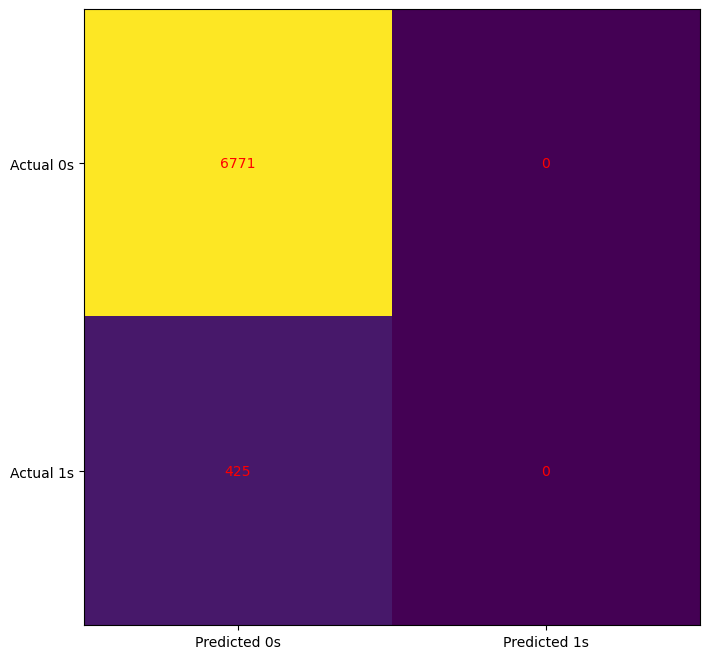

In [67]:
cm = confusion_matrix(y_train, log_reg.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()